In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Gettings findings from the data

In [191]:
df = pd.read_excel('../used_data/cleaned-dataset.xlsx')

In [192]:
df.dtypes

Title                                                   object
Vulnearbilities Rewarded                                 int64
Average Payout                                         float64
Hall of Famers                                           int64
Number People                                            int64
Maximum Reword                                           int64
annocument_count                                         int64
Technology API Target                                    int64
Technology Web Targets                                   int64
Technology Android Targets                               int64
Technology IoT Targets                                   int64
Technology iOS Targets                                   int64
Technology Hardware Targets                              int64
Featured Staff Picks                                     int64
Featured BCTeamHunt2022                                  int64
Featured New Scope & Increased Rewards                 

In [193]:
df.columns

Index(['Title', 'Vulnearbilities Rewarded', 'Average Payout', 'Hall of Famers',
       'Number People', 'Maximum Reword', 'annocument_count',
       'Technology API Target', 'Technology Web Targets',
       'Technology Android Targets', 'Technology IoT Targets',
       'Technology iOS Targets', 'Technology Hardware Targets',
       'Featured Staff Picks', 'Featured BCTeamHunt2022',
       'Featured New Scope & Increased Rewards', 'Featured Self Service',
       'Featured Highest Reward Range', 'Featured Coordinated Disclosure',
       'Featured Atlassian', 'Featured Needs a P1 warrior', 'Has Technology',
       'Has Featured', 'Has Industry',
       'Industry_Banking and Financial Services',
       'Industry_Business Management Solutions and Software',
       'Industry_Cloud Services', 'Industry_Electronics and Technology',
       'Industry_eCommerce and Retail', 'Industry_nan', 'Reward Range Average',
       'Validation Within Hours', 'P1 Average', 'P2 Average', 'P3 Average',
       '

## Heatmap

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_60044/1766908725.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ann= df.corr(method ='pearson')


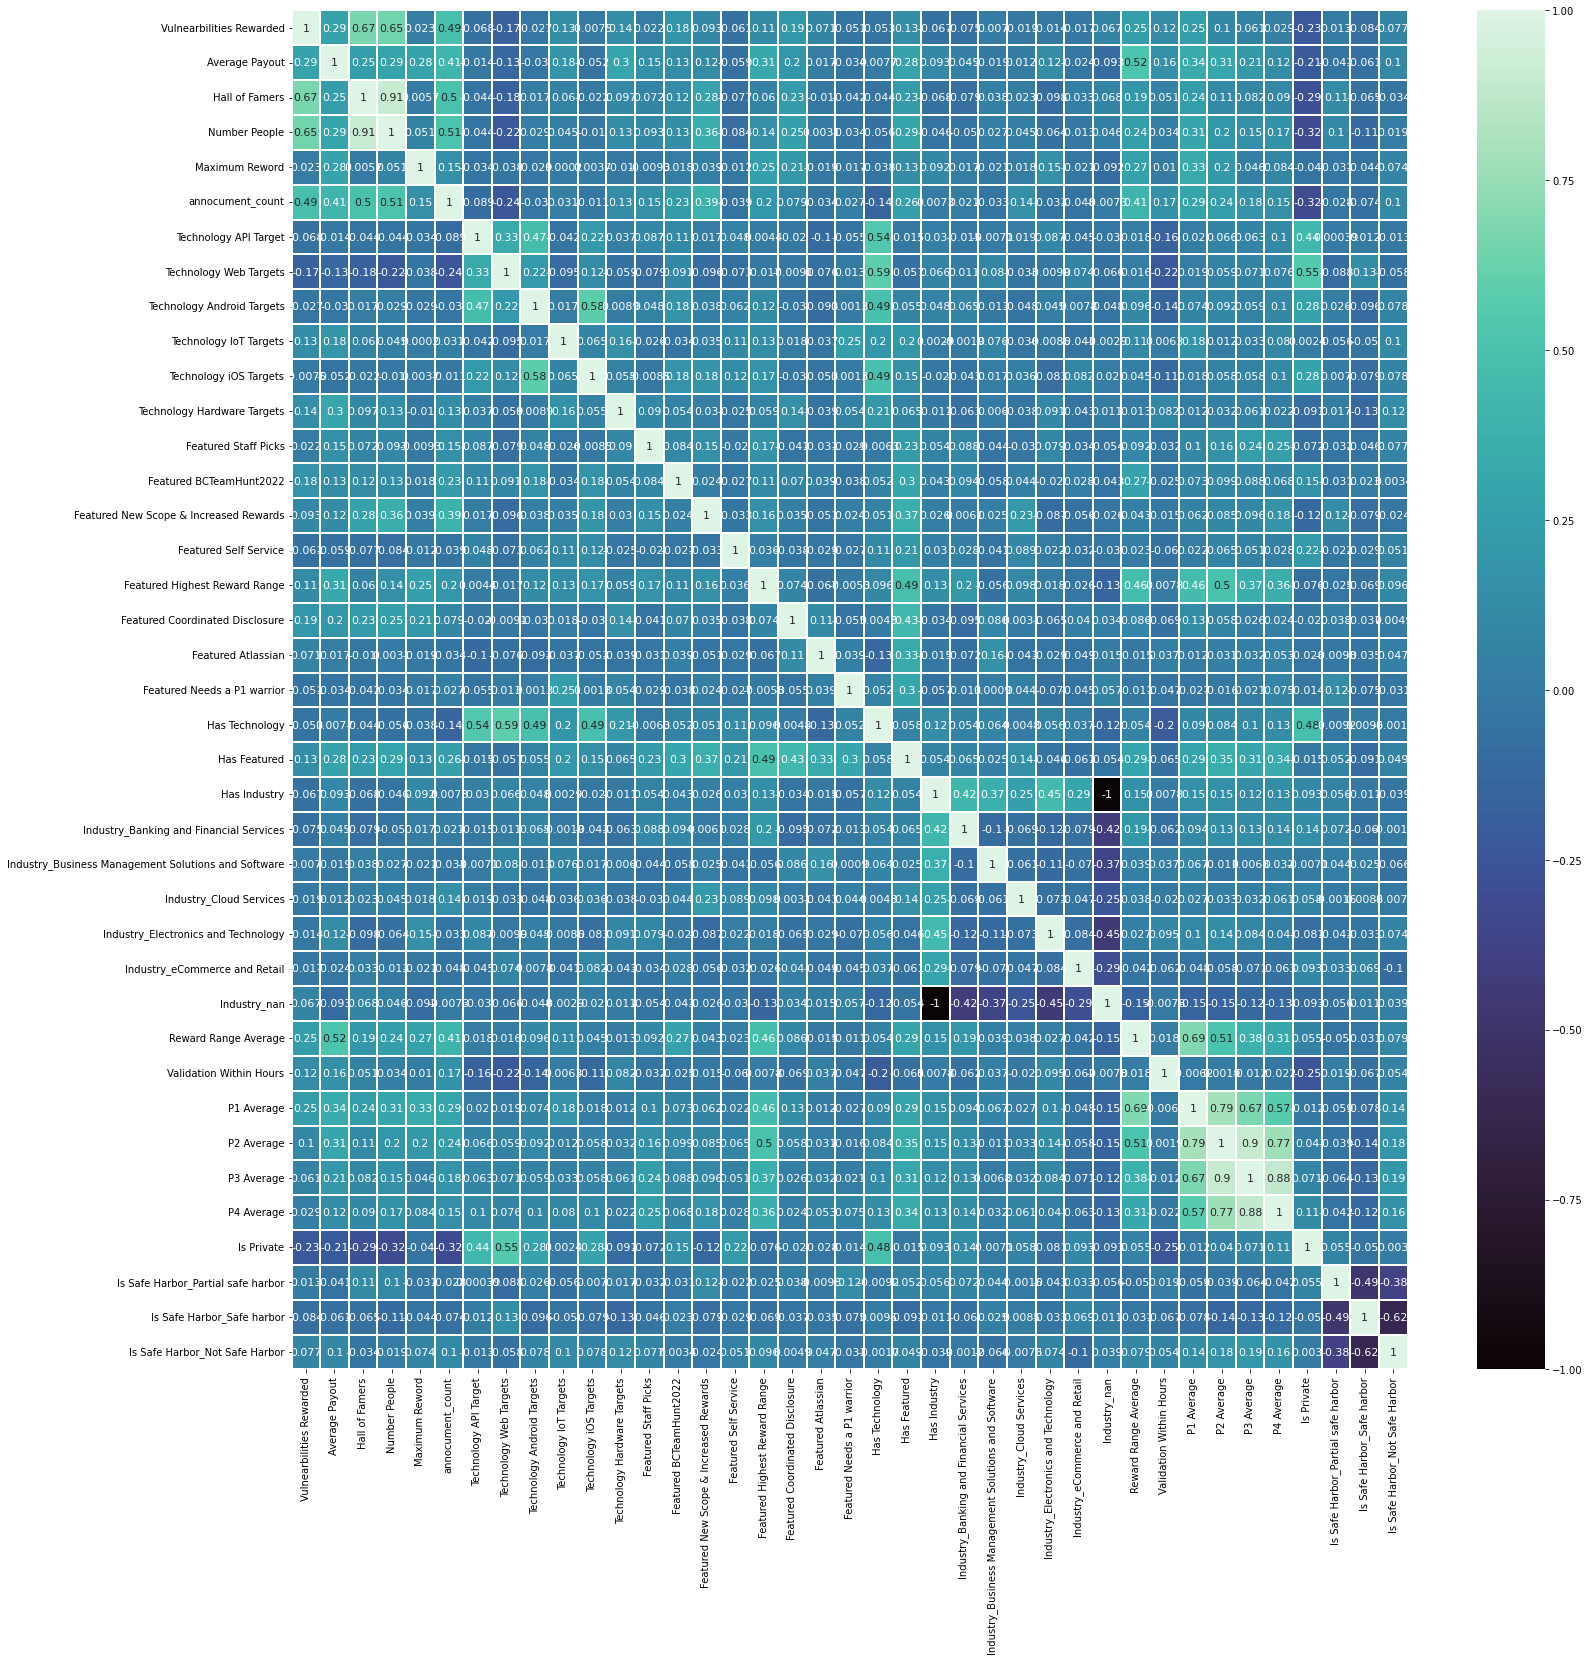

In [194]:
df_ann= df.corr(method ='pearson')
fig, ax = plt.subplots(figsize=(25,25))
fig.set_facecolor('white')
sns.heatmap(df_ann,annot= True,cmap="mako",annot_kws={'size': 11},linewidths=2,ax=ax)
plt.savefig('heatmap.png', dpi=300)


## Hypothesis

### 1.Cross-industry differences in vulnerabilities rewarded, participants and payouts

In [195]:
df.shape

(329, 40)

In [196]:
df["Has Industry"].value_counts()

False    200
True     129
Name: Has Industry, dtype: int64

In [197]:
df_industry = df[df['Has Industry']==1]

In [198]:
df_industry.shape

(129, 40)

In [199]:
indu_vuln_rewarded_mean = df_industry['Vulnearbilities Rewarded'].mean()
print("Industry vulnearbilty rewarded average: ",round(indu_vuln_rewarded_mean,2))
indu_people_mean = df_industry['Number People'].mean()
print("Industry number of people average: ",round(indu_people_mean,2))
indu_payout_mean = df_industry['Average Payout'].mean()
print("Industry number of pay average: ",round(indu_payout_mean,2))

Industry vulnearbilty rewarded average:  92.26
Industry number of people average:  382.33
Industry number of pay average:  389.0


In [200]:
vuln_rewarded_mean = df['Vulnearbilities Rewarded'].mean()
print("Overall vulnearbilty rewarded average: ",round(vuln_rewarded_mean,2))
people_mean = df['Number People'].mean()
print("Overall Number of people average: ",round(people_mean,2))
payout_mean = df['Average Payout'].mean()
print("Overall number of pay average: ",round(payout_mean,2))

Overall vulnearbilty rewarded average:  112.07
Overall Number of people average:  419.93
Overall number of pay average:  307.24


In [201]:
df.columns

Index(['Title', 'Vulnearbilities Rewarded', 'Average Payout', 'Hall of Famers',
       'Number People', 'Maximum Reword', 'annocument_count',
       'Technology API Target', 'Technology Web Targets',
       'Technology Android Targets', 'Technology IoT Targets',
       'Technology iOS Targets', 'Technology Hardware Targets',
       'Featured Staff Picks', 'Featured BCTeamHunt2022',
       'Featured New Scope & Increased Rewards', 'Featured Self Service',
       'Featured Highest Reward Range', 'Featured Coordinated Disclosure',
       'Featured Atlassian', 'Featured Needs a P1 warrior', 'Has Technology',
       'Has Featured', 'Has Industry',
       'Industry_Banking and Financial Services',
       'Industry_Business Management Solutions and Software',
       'Industry_Cloud Services', 'Industry_Electronics and Technology',
       'Industry_eCommerce and Retail', 'Industry_nan', 'Reward Range Average',
       'Validation Within Hours', 'P1 Average', 'P2 Average', 'P3 Average',
       '

In [202]:
df_banking = df[df['Industry_Banking and Financial Services']==1]

In [203]:
banking_vuln_rewarded_mean = df_banking['Vulnearbilities Rewarded'].mean()
print("Banking vulnearbilty rewarded average: ",round(banking_vuln_rewarded_mean,2))
banking_people_mean = df_banking['Number People'].mean()
print("Banking Number of people average: ",round(banking_people_mean,2))
banking_payout_mean = df_banking['Average Payout'].mean()
print("Banking number of pay average: ",round(banking_payout_mean,2))

Banking vulnearbilty rewarded average:  59.74
Banking Number of people average:  322.94
Banking number of pay average:  401.31


In [204]:
df_banking.shape

(34, 40)

In [205]:
df_business = df[df['Industry_Business Management Solutions and Software']==1]
df_business.shape

(27, 40)

In [206]:
business_vuln_rewarded_mean = df_business['Vulnearbilities Rewarded'].mean()
print("Banking vulnearbilty rewarded average: ",round(business_vuln_rewarded_mean,2))
business_people_mean = df_business['Number People'].mean()
print("Banking Number of people average: ",round(business_people_mean,2))
business_payout_mean = df_business['Average Payout'].mean()
print("Banking number of pay average: ",round(business_payout_mean,2))

Banking vulnearbilty rewarded average:  117.67
Banking Number of people average:  478.04
Banking number of pay average:  261.59


In [209]:
df_Industry_Cloud= df[df['Industry_Cloud Services']==1]
df_Industry_Cloud.shape

(13, 40)

In [210]:
cloud_vuln_rewarded_mean = df_Industry_Cloud['Vulnearbilities Rewarded'].mean()
print("Cloud vulnearbilty rewarded average: ",round(cloud_vuln_rewarded_mean,2))
cloud_people_mean = df_Industry_Cloud['Number People'].mean()
print("Cloud Number of people average: ",round(cloud_people_mean,2))
cloud_payout_mean = df_Industry_Cloud['Average Payout'].mean()
print("Cloud number of pay average: ",round(cloud_payout_mean,2))


Cloud vulnearbilty rewarded average:  90.31
Cloud Number of people average:  564.38
Cloud number of pay average:  347.73


In [214]:
df_Eletronic= df[df['Industry_Electronics and Technology']==1]
df_Eletronic.shape

(38, 40)

In [213]:
eletro_vuln_rewarded_mean = df_Eletronic['Vulnearbilities Rewarded'].mean()
print("Eletronic vulnearbilty rewarded average: ",round(eletro_vuln_rewarded_mean,2))
eletro_people_mean = df_Eletronic['Number People'].mean()
print("Eletronic Number of people average: ",round(eletro_people_mean,2))
eletro_payout_mean = df_Eletronic['Average Payout'].mean()
print("Eletronic number of pay average: ",round(eletro_payout_mean,2))


Eletronic vulnearbilty rewarded average:  102.89
Eletronic Number of people average:  304.55
Eletronic number of pay average:  551.07


In [216]:
df_Ecommerce= df[df['Industry_eCommerce and Retail']==1]
df_Ecommerce.shape

(17, 40)

In [217]:
ecomme_vuln_rewarded_mean = df_Ecommerce['Vulnearbilities Rewarded'].mean()
print("Ecommerce vulnearbilty rewarded average: ",round(ecomme_vuln_rewarded_mean,2))
ecomme_people_mean = df_Ecommerce['Number People'].mean()
print("Ecommerce Number of people average: ",round(ecomme_people_mean,2))
ecomme_payout_mean = df_Ecommerce['Average Payout'].mean()
print("Ecommerce number of pay average: ",round(ecomme_payout_mean,2))


Ecommerce vulnearbilty rewarded average:  94.65
Ecommerce Number of people average:  383.76
Ecommerce number of pay average:  236.05


### Influence of the industry on vulnerability rewarded, participants and payouts

In [239]:
df.columns

Index(['Title', 'Vulnearbilities Rewarded', 'Average Payout', 'Hall of Famers',
       'Number People', 'Maximum Reword', 'annocument_count',
       'Technology API Target', 'Technology Web Targets',
       'Technology Android Targets', 'Technology IoT Targets',
       'Technology iOS Targets', 'Technology Hardware Targets',
       'Featured Staff Picks', 'Featured BCTeamHunt2022',
       'Featured New Scope & Increased Rewards', 'Featured Self Service',
       'Featured Highest Reward Range', 'Featured Coordinated Disclosure',
       'Featured Atlassian', 'Featured Needs a P1 warrior', 'Has Technology',
       'Has Featured', 'Has Industry',
       'Industry_Banking and Financial Services',
       'Industry_Business Management Solutions and Software',
       'Industry_Cloud Services', 'Industry_Electronics and Technology',
       'Industry_eCommerce and Retail', 'Industry_nan', 'Reward Range Average',
       'Validation Within Hours', 'P1 Average', 'P2 Average', 'P3 Average',
       '

In [243]:
from sklearn.linear_model import LinearRegression

# define the independent variables (x) and the dependent variable (y)
x = df_industry[['Vulnearbilities Rewarded', 'Number People']]
y = df_industry['Average Payout']

# instantiate the LinearRegression object
reg = LinearRegression()

# fit the linear regression model
reg.fit(x, y)

# print the coefficients of the independent variables
print(reg.coef_)

# print the intercept of the model
print(reg.intercept_)
# print the R-squared value of the model
print(reg.score(x, y))

[1.11555258 0.12007836]
240.17863527199356
0.09526862096039512


In [ ]:
#Results 
# Average Payout = 1.11555258 * Vulnerabilities Rewarded + 0.12007836 * Number People + 240.17863527199356

In [256]:
from sklearn.linear_model import LinearRegression

# define the independent variables (x) and the dependent variable (y)
x = df_industry[['Average Payout', 'Hall of Famers',
       'Number People', 'Maximum Reword', 'annocument_count','Reward Range Average',
       'Validation Within Hours', 'P1 Average', 'P2 Average', 'P3 Average',
       'P4 Average', 'Is Private', 'Is Safe Harbor_Partial safe harbor',
       'Is Safe Harbor_Safe harbor', 'Is Safe Harbor_Not Safe Harbor']]
y = df_industry['Vulnearbilities Rewarded']

# instantiate the LinearRegression object
reg = LinearRegression()

# fit the linear regression model
reg.fit(x, y)

# print the coefficients of the independent variables
print(reg.coef_)

# print the intercept of the model
print(reg.intercept_)
# print the R-squared value of the model
print(reg.score(x, y))
coef = reg.coef_
coef_abs = np.abs(coef)
top_n = np.argsort(coef_abs)[-7:]

# get the names of the independent variables that correspond to the top n coefficients
top_n_features = x.columns[top_n]

print(top_n_features)

[-8.33717623e-03  3.40606587e-01  3.72912628e-03 -1.41887497e-04
  1.74935062e+01 -1.22914921e-03  4.60776964e-02  1.07719948e-02
 -4.67348522e-02  1.09737648e-01 -1.99292437e-01  2.04259567e+01
  3.56069710e+00 -3.11473907e+00 -4.45958033e-01]
-11.754714588702697
0.6732033882389119
Index(['P4 Average', 'Hall of Famers', 'Is Safe Harbor_Not Safe Harbor',
       'Is Safe Harbor_Safe harbor', 'Is Safe Harbor_Partial safe harbor',
       'annocument_count', 'Is Private'],
      dtype='object')


Results:
- 129 programs are in the cross-industry category
- average payout is 1.5 times higher than the average payout of all programs

### 2.Cross-Technologies differences in vulnerabilities rewarded, participants and payouts

In [218]:
df.columns

Index(['Title', 'Vulnearbilities Rewarded', 'Average Payout', 'Hall of Famers',
       'Number People', 'Maximum Reword', 'annocument_count',
       'Technology API Target', 'Technology Web Targets',
       'Technology Android Targets', 'Technology IoT Targets',
       'Technology iOS Targets', 'Technology Hardware Targets',
       'Featured Staff Picks', 'Featured BCTeamHunt2022',
       'Featured New Scope & Increased Rewards', 'Featured Self Service',
       'Featured Highest Reward Range', 'Featured Coordinated Disclosure',
       'Featured Atlassian', 'Featured Needs a P1 warrior', 'Has Technology',
       'Has Featured', 'Has Industry',
       'Industry_Banking and Financial Services',
       'Industry_Business Management Solutions and Software',
       'Industry_Cloud Services', 'Industry_Electronics and Technology',
       'Industry_eCommerce and Retail', 'Industry_nan', 'Reward Range Average',
       'Validation Within Hours', 'P1 Average', 'P2 Average', 'P3 Average',
       '

In [220]:
df_technology= df[df['Has Technology']==1]
df_technology.shape

(148, 40)

In [221]:
tech_vuln_rewarded_mean = df_technology['Vulnearbilities Rewarded'].mean()
print("Technology vulnearbilty rewarded average: ",round(tech_vuln_rewarded_mean,2))
tech_people_mean = df_technology['Number People'].mean()
print("Technology Number of people average: ",round(tech_people_mean,2))
tech_payout_mean = df_technology['Average Payout'].mean()
print("Technology number of pay average: ",round(tech_payout_mean,2))


Technology vulnearbilty rewarded average:  98.22
Technology Number of people average:  379.59
Technology number of pay average:  313.25


In [223]:
df_ios= df[df['Technology iOS Targets']==1]
df_ios.shape


(54, 40)

In [224]:
ios_vuln_rewarded_mean = df_ios['Vulnearbilities Rewarded'].mean()
print("iOS vulnearbilty rewarded average: ",round(ios_vuln_rewarded_mean,2))
ios_people_mean = df_ios['Number People'].mean()
print("iOS Number of people average: ",round(ios_people_mean,2))
ios_payout_mean = df_ios['Average Payout'].mean()
print("iOS number of pay average: ",round(ios_payout_mean,2))


iOS vulnearbilty rewarded average:  108.02
iOS Number of people average:  404.67
iOS number of pay average:  224.62


In [227]:
df_hardware= df[df['Technology Hardware Targets']==1]
df_hardware.shape

(11, 40)

In [228]:
hardware_vuln_rewarded_mean = df_hardware['Vulnearbilities Rewarded'].mean()
print("Hardware vulnearbilty rewarded average: ",round(hardware_vuln_rewarded_mean,2))
hardware_people_mean = df_hardware['Number People'].mean()
print("Hardware Number of people average: ",round(hardware_people_mean,2))
hardware_payout_mean = df_hardware['Average Payout'].mean()
print("Hardware number of pay average: ",round(hardware_payout_mean,2))


Hardware vulnearbilty rewarded average:  288.91
Hardware Number of people average:  878.64
Hardware number of pay average:  1461.91


In [230]:
df_api = df[df['Technology API Target']==1]
df_api.shape

(64, 40)

In [231]:
api_vuln_rewarded_mean = df_api['Vulnearbilities Rewarded'].mean()
print("API vulnearbilty rewarded average: ",round(api_vuln_rewarded_mean,2))
api_people_mean = df_api['Number People'].mean()
print("API Number of people average: ",round(api_people_mean,2))
api_payout_mean = df_api['Average Payout'].mean()
print("API number of pay average: ",round(api_payout_mean,2))

API vulnearbilty rewarded average:  79.27
API Number of people average:  361.53
API number of pay average:  286.57


In [233]:
df_iot = df[df['Technology IoT Targets']==1]
df_iot.shape

(10, 40)

In [234]:
iot_vuln_rewarded_mean = df_iot['Vulnearbilities Rewarded'].mean()
print("IoT vulnearbilty rewarded average: ",round(iot_vuln_rewarded_mean,2))
iot_people_mean = df_iot['Number People'].mean()
print("IoT Number of people average: ",round(iot_people_mean,2))
iot_payout_mean = df_iot['Average Payout'].mean()
print("IoT number of pay average: ",round(iot_payout_mean,2))

IoT vulnearbilty rewarded average:  290.4
IoT Number of people average:  587.3
IoT number of pay average:  1032.88


In [235]:
df_android = df[df['Technology Android Targets']==1]
df_android.shape

(54, 40)

In [236]:
android_vuln_rewarded_mean = df_android['Vulnearbilities Rewarded'].mean()
print("Android vulnearbilty rewarded average: ",round(android_vuln_rewarded_mean,2))
android_people_mean = df_android['Number People'].mean()
print("Android Number of people average: ",round(android_people_mean,2))
android_payout_mean = df_android['Average Payout'].mean()
print("Android number of pay average: ",round(android_payout_mean,2))

Android vulnearbilty rewarded average:  97.39
Android Number of people average:  463.28
Android number of pay average:  259.47


In [237]:
df_web= df[df['Technology Web Targets']==1]
df_web.shape

(73, 40)

In [238]:
web_vuln_rewarded_mean = df_web['Vulnearbilities Rewarded'].mean()
print("Web vulnearbilty rewarded average: ",round(web_vuln_rewarded_mean,2))
web_people_mean = df_web['Number People'].mean()
print("Web Number of people average: ",round(web_people_mean,2))
web_payout_mean = df_web['Average Payout'].mean()
print("Web number of pay average: ",round(web_payout_mean,2))


Web vulnearbilty rewarded average:  34.63
Web Number of people average:  151.6
Web number of pay average:  137.24


Results:
